### **Task 4- Train and Evaluation**

#### **Project Path and imports**

In [1]:
import sys
from pathlib import Path
from src.train.pipeline import run_pipeline
from src.ann.config import ANNConfig
from src.pso.config import PSOConfig

# project root = parent of "Experimemts"
PROJECT_ROOT = Path(__file__).resolve().parents[1] if "__file__" in globals() else Path.cwd().parents[0]

# Make sure root is on sys.path so we can import train, pso, etc.
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

PROJECT_ROOT


WindowsPath('C:/university/BC/F21BC-Coursework/src/notebooks')

#### **ANN Configs**

In [2]:
# ANN CONFIG — baseline
ann_config = ANNConfig(
    input_dim=8,   # 8 features in dataset
    hidden_layers=[
        {"units": 16, "activation": "relu"},
        {"units": 8,  "activation": "relu"},
    ],
    output_dim=1,
)


#### **PSO Configs**

In [3]:
# PSO CONFIG — baseline
pso_config = PSOConfig(
    swarm_size=40,
    iterations=400,
    alpha=0.72,
    beta=1.49,
    gamma=1.49,
    delta=0.0,
    e=1.0,
    bounds=(-5.0, 5.0),
    v_clamp=(-2.0, 2.0),
    k_informants=3,
    rewire_every=None,
    boundary_mode="clip",
    seed=42,
    minimize=True,
)




#### **Train and Test evaluation**


======== EXPERIMENTAL PIPELINE (1 RUNS) ========

 Run 1/1
[PSO] iter 1/400 gbest=20.082295
[PSO] iter 41/400 gbest=8.691554
[PSO] iter 81/400 gbest=8.096290
[PSO] iter 121/400 gbest=8.036174
[PSO] iter 161/400 gbest=7.881660
[PSO] iter 201/400 gbest=7.588857
[PSO] iter 241/400 gbest=7.203782
[PSO] iter 281/400 gbest=7.074314
[PSO] iter 321/400 gbest=6.742336
[PSO] iter 361/400 gbest=6.675428
[PSO] iter 400/400 gbest=6.627006
   gBest=6.6270 | Train MAE=6.6270 | Test MAE=7.2031

======== EXPERIMENT SUMMARY (Mean ± SD) ========
Number of Runs:   1
ANN Architecture: 16(relu) → 8(relu)
PSO Config:       swarm=40, iter=400, αlpha=0.72, beta=1.49, gamma=1.49, bounds=(-5.0, 5.0)
Average gBest:    6.6270 ± 0.0000
Average Train MAE:6.6270 ± 0.0000
Average Test MAE: 7.2031 ± 0.0000


C:\university\BC\F21BC-Coursework\src\train\pipeline.py:170: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.94])


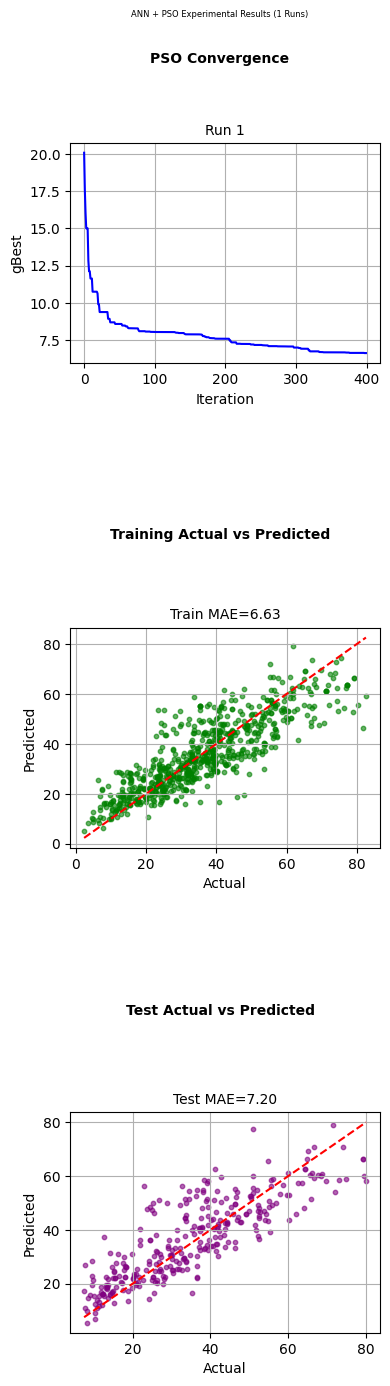

visualization completed.


In [4]:
# Run training pipeline
run_pipeline(ann_config, pso_config,runs=1)

#### **Results & Discussion**


This is our initial experiment used an ANN with two hidden layers which contains 16, 8 neurons with RELU activation and PSO configuration of 40 particles and 400 iterations. The model achieved a training MAE(mean absolute error) of 6.6270 and testing MAE 7.2031 indicating good generalisation with minimal overfitting. The PSO convergence curve showed a steep improvement in the early iterations followed by gradual stabilisation, suggesting effective exploration and convergence toward optimal network parameters. The small gap between training and testing MAE confirms that the network successfully captured the non-linear relationships within the concrete strength dataset. Overall, this result establishes a strong baseline, demonstrating that PSO can efficiently optimise ANN weights and biases for regression problems without gradient-based learning, while providing a stable and interpretable convergence pattern.